In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
import pandas as pd
import numpy as np

# Solution for Question 1

In [ ]:
# All files have been formatted to remove undesired records from top & saved as csv
hdfc_file = 'Q1-Data/HDFC Nifty ETF.csv'
kotak_file = 'Q1-Data/KOTAK Nifty ETF.csv'
reliance_file = 'Q1-Data/Reliance Nifty ETF.csv'
uti_file = 'Q1-Data/UTI Nifty ETF.csv'

nifty_file = 'Q1-Data/NIFTY-TotalReturnsIndex.csv'

In [ ]:
# Read ETF data files
# Convert string data with commas to float
# Rename 'NAV' column to 'Close'
hdfc = pd.read_csv(hdfc_file, index_col=0, parse_dates=True, thousands=',', dtype=float)
kotak = pd.read_csv(kotak_file, index_col=0, parse_dates=True, header=0, names=['Date', 'Close'], thousands=',', dtype=float)
reliance = pd.read_csv(reliance_file, index_col=0, parse_dates=True, header=0, names=['Date', 'Close'], thousands=',', dtype=float)
uti = pd.read_csv(uti_file, index_col=0, parse_dates=True, header=0, names=['Date', 'Close'], thousands=',', dtype=float)

In [ ]:
# Dictionary to store ETF data
etfs = {
    'HDFC': hdfc,
    'Kotak': kotak,
    'Reliance': reliance,
    'UTI': uti
}

In [ ]:
# Display first and last ETF close prices
for etf, val in etfs.items():
    print(f"""ETF Name: {etf}, Records: {val.shape[0]}, 
    Close Price -> {str(val.index[0])[:10]}: {val.iloc[0].Close}, {str(val.index[-1])[:10]}: {val.iloc[-1].Close}""")

In [ ]:
# Read Nifty returns files
# Rename 'Total Returns Index' column to 'Close'
nifty = pd.read_csv(nifty_file, index_col=0, parse_dates=True, header=0, names=['Date', 'Close'])

In [ ]:
# Display first and last benchmark close prices
print(f"""NIFTY, Records: {val.shape[0]}, 
    Close Price -> {str(val.index[0])[:10]}: {val.iloc[0].Close}, {str(val.index[-1])[:10]}: {val.iloc[-1].Close}""")

In [ ]:
def tracking_error(benchmark, etf, year=None):
    """Calculates annualized tracking error of ETF funds
    @params:
    benchmark = pandas dataframe with benchmark daily close ('Close' column) indexed by date
    etf = pandas dataframe with ETF daily close indexed by date
    year = calendar year for tracking error calculation. Default None for calculating for entire period
    @returns:
    te = tracking error
    """    
    # Calculate daily returns of benchmark & ETF & store in dataframes
    benchmark_rets = benchmark.Close.pct_change().to_frame('benchmark_rets')
    etf_rets = etf.Close.pct_change().to_frame('etf_rets')
    
    # Merge benchmark & etf returns by date & fill missing returns with previous day's returns
    rets = benchmark_rets.merge(etf_rets, how='outer', on='Date')
    rets.sort_index(inplace=True)
    rets.fillna(method='ffill', inplace=True)
    rets.dropna(inplace=True) # Drop first record with nan value in both columns
    
    # Filter by year if year is available
    if year:
        rets = rets.loc[str(year)]
    
    # Calculate annualized tracking error
    N = rets.shape[0]
    te_d = np.sqrt(np.sum(np.square(rets.benchmark_rets - rets.etf_rets)) / (N - 1)) # daily tracking error
    te = np.sqrt(252) * te_d # annualized tracking error
    
    return te

In [ ]:
te = pd.DataFrame(columns=['2016', '2017']) # Create empty dataframe to store tracking errors
for etf, val in etfs.items(): # Calculate & store annualized tracking errors for all ETFs
    te_2016 = tracking_error(nifty, val, '2016')
    te_2017 = tracking_error(nifty, val, '2017')
    # Append ETF TE in dataframe
    te.loc[etf] = [te_2016, te_2017]
te

In [ ]:
# Arrange in ascending order of 2016 annualized tracking error
te['2016'].sort_values()

In [ ]:
# Arrange in ascending order of 2017 annualized tracking error
te['2017'].sort_values()

In [ ]:
# Funds with increase in annualized TE from 2016 to 2017
te[te['2016'] < te['2017']] # No fund

In [ ]:
# Funds with decrease in annualized TE from 2016 to 2017
te[te['2016'] > te['2017']] # All four funds

# Solution for Question 2

In [46]:
from functools import reduce

In [47]:
# All files have been formatted to remove undesired records from top & saved as csv
nifty_etf_file = 'Q2-Data/Nifty ETF.csv'
gold_etf_file = 'Q2-Data/Gold ETF.csv'
junior_etf_file = 'Q2-Data/Junior ETF.csv'

In [48]:
# Read ETF data files
# Convert string data with commas to float
nifty = pd.read_csv(nifty_etf_file, index_col=0, parse_dates=True, header=0, names=['Date','nifty'], thousands=',', dtype=float)
gold = pd.read_csv(gold_etf_file, index_col=0, parse_dates=True, header=0, names=['Date', 'gold'], thousands=',', dtype=float)
jr = pd.read_csv(junior_etf_file, index_col=0, parse_dates=True, header=0, names=['Date', 'junior'], thousands=',', dtype=float)

In [49]:
def merge(dfs):
    """Merges dataframes on date & fill missing values with previous day's value
    @params:
    dfs = list of dataframes to be merged
    @returns:
    merged_df = merged dataframe
    """
    merged_df = reduce(lambda left, right: pd.merge(left, right, how='outer', on='Date'), dfs)
    merged_df.sort_index(inplace=True)
    merged_df.fillna(method='ffill', inplace=True)
    return merged_df

In [50]:
# Merge all dataframes on date & fill missing values with previous day's value
etfs = merge([nifty, gold, jr])
etfs
etfs.shape

,nifty,gold,junior
Date,,,
2016-01-01,805.06,2280.20,203.62
2016-01-04,790.31,2304.70,200.58
2016-01-05,789.81,2319.65,201.32
2016-01-06,785.16,2333.10,199.98
2016-01-07,768.92,2366.80,195.78
...,...,...,...
2017-12-22,1079.36,2579.45,313.16
2017-12-26,1082.81,2600.30,314.64
2017-12-27,1082.37,2616.55,313.20


(495, 3)

In [51]:
def invest(funds, prices, ratio):
    """Invests funds into instruments as per ratio
    @params:
    funds = total money to be invested
    prices = list of prices of instruments
    ratio = desired investment ratio
    @returns:
    cash, units = uninvested cash after investment, list of units in each instrument after investment
    """
    assert len(prices) == len(ratio), f'prices count {len(prices)} != ratio count {len(ratio)}'
    
    # Allocate funds to a separate pot for each instrument as per ratioPortfolio value: {np.round(sum(invested, cash), 2)}
    fund_pots = [r / sum(ratio) * funds for r in ratio]
    
    units = [int(f // p) for f, p in zip(fund_pots, prices)]
    invested = [p * u for p, u in zip(prices, units)]
    cash = np.round(funds - sum(invested), 2)
    
    ratio = [np.round(i / sum(invested), 2) for i in invested]
    print(f'Portfolio value: {np.round(sum(invested, cash))} ## Cash component: {cash} ## Investments ratio: {ratio} ## Units: {units}')
    
    print(cash)
    return cash, units

In [52]:
def rebalance(prices, units, ratio, cash):
    """Rebalances cash + investments as per ratio
    @params:
    prices = list of prices of instruments
    units = list of units in each instrument
    ratio = desired rebalance ratio
    cash = uninvested cash in fund
    @returns:
    cash, units = uninvested cash after rebalance, list of units in each instrument after rebalance
    """
    assert len(prices) == len(units) == len(ratio), \
        f'prices count {len(prices)} != units count {len(units)} != ratio count {len(ratio)}'
    
    invested = [p * u for p, u in zip(prices, units)]
    portfolio_val = np.round(cash + sum(invested), 2)
    
    cash, units = invest(portfolio_val, prices, ratio) 
    return cash, units

In [53]:
def redeem(prices, units, cash):
    """Portfolio redemption: go all cash
    @params:
    prices = list of prices of instruments
    units = list of units in each instrument
    cash = end portfolio amount
    @returns:
    cash, units = uninvested cash after redemption, list of units in each instrument after rebalance
    """
    assert len(prices) == len(units), f'prices count {len(prices)} != units count {len(units)}'
    
    invested = [np.round(p * u, 2) for p, u in zip(prices, units)]
    cash = np.round(cash + sum(invested), 2)
    invested = 0
    units = [0 for u in units]
    print(f'Portfolio Value: {cash} ## Cash component: {cash} ## Units: {units}')
    
    return cash, units

In [54]:
data = etfs.copy()
# Create empty columns for allocation units
data = data.assign(nifty_units = np.nan, gold_units = np.nan, junior_units = np.nan, cash = np.nan)

In [55]:
## Code to backtest strategy
## Displays portfolio values only on days when traded

from datetime import date as _date

initial_capital = 100000000 # 100 million INR
start_date = _date(2016, 1, 1) # Portfolio Allocation Start Date
end_date = _date(2017, 12, 29) # Portfolio Redemption Date
allocation_ratio = (5, 2, 3) # Allocation ratio of 5:2:3
prev_units = [0, 0, 0] # Unit allocation initialization
prev_cash = 0 # Cash initialization
month = data.index.month

print('Start....')
print('Investments ratio & Units in order of [Nifty, Gold, Junior]')
print('===========================================================')

for i in range(0, data.shape[0]): # Loop through all trading days
    date, nifty, gold, junior = pd.to_datetime(data.index.values[i]), data.iloc[i]['nifty'], data.iloc[i]['gold'], data.iloc[i]['junior']
    # Identify quarter end dates for rebalancing
    qtr_end = False
    if date != end_date:
        qtr_end = True if month[i] != month[i + 1] and month[i] in (3, 6, 9, 12) else False
    
    if date ==  start_date:
        # Portfolio allocation begin
        print(date)
        print(f'Initial Capital : {initial_capital}')
        print('Begin portfolio allocation')
        cash, units = invest(initial_capital, [nifty, gold, junior], allocation_ratio) # Initial allocation
        data.loc[date]['nifty_units'], data.loc[date]['gold_units'], data.loc[date]['junior_units'] = units # Units assignment
        data.loc[date]['cash'] = cash
        prev_units, prev_cash = units, cash
        print('===========================================================')
    elif date == end_date:
        # Portfolio redemption
        print('Portfolio redemption')
        cash, units = redeem([nifty, gold, junior], prev_units,cash) # Redeem portfolio, go all cash
        data.loc[date]['nifty_units'], data.loc[date]['gold_units'], data.loc[date]['junior_units'] = units # Units assignment
        data.loc[date]['cash'] = cash
        print('===========================================================')
    elif qtr_end == True:
        # Quarter end rebalancing
        print(date)
        print(f'Fund value : {initial_capital}')
        print('Begin portfolio rebalance')
        cash, units = rebalance([nifty, gold, junior], prev_units, allocation_ratio, cash) # Rebalance
        data.loc[date]['nifty_units'], data.loc[date]['gold_units'], data.loc[date]['junior_units'] = units # Units assignment
        data.loc[date]['cash'] = cash
        prev_units, prev_cash = units, cash
        print('===========================================================')
    else:
        # No change in units assignment & cash
        data.loc[date]['nifty_units'], data.loc[date]['gold_units'], \
            data.loc[date]['junior_units'] = prev_units
        data.loc[date]['cash'] = prev_cash

Start....
Investments ratio & Units in order of [Nifty, Gold, Junior]
2016-01-01 00:00:00
Initial Capital : 100000000
Begin portfolio allocation
Portfolio value: 100000000.0 ## Cash component: 558.92 ## Investments ratio: [0.5, 0.2, 0.3] ## Units: [62107, 8771, 147333]
558.92
2016-03-31 00:00:00
Fund value : 100000000
Begin portfolio rebalance
Portfolio value: 99349847.0 ## Cash component: 1485.46 ## Investments ratio: [0.5, 0.2, 0.3] ## Units: [62778, 7750, 158419]
1485.46
2016-06-30 00:00:00
Fund value : 100000000
Begin portfolio rebalance
Portfolio value: 107063106.0 ## Cash component: 2689.17 ## Investments ratio: [0.5, 0.2, 0.3] ## Units: [63510, 7709, 155970]
2689.17
2016-09-30 00:00:00
Fund value : 100000000
Begin portfolio rebalance
Portfolio value: 113466349.0 ## Cash component: 1920.79 ## Investments ratio: [0.5, 0.2, 0.3] ## Units: [64573, 8032, 147948]
1920.79
2016-12-30 00:00:00
Fund value : 100000000
Begin portfolio rebalance
Portfolio value: 106492580.0 ## Cash component

In [56]:
data

,nifty,gold,junior,nifty_units,gold_units,junior_units,cash
Date,,,,,,,
2016-01-01,805.06,2280.20,203.62,62107.0,8771.0,147333.0,5.589200e+02
2016-01-04,790.31,2304.70,200.58,62107.0,8771.0,147333.0,5.589200e+02
2016-01-05,789.81,2319.65,201.32,62107.0,8771.0,147333.0,5.589200e+02
2016-01-06,785.16,2333.10,199.98,62107.0,8771.0,147333.0,5.589200e+02
2016-01-07,768.92,2366.80,195.78,62107.0,8771.0,147333.0,5.589200e+02
...,...,...,...,...,...,...,...
2017-12-22,1079.36,2579.45,313.16,63188.0,9574.0,137181.0,1.973520e+03
2017-12-26,1082.81,2600.30,314.64,63188.0,9574.0,137181.0,1.973520e+03
2017-12-27,1082.37,2616.55,313.20,63188.0,9574.0,137181.0,1.973520e+03


In [13]:
def daily_returns(data):
    """Calculate daily returns
    @params:
    data = dataframe with daily prices & units 
    @returns:
    daily_rets = daily returns
    """
    portfolio_val = data.nifty * data.nifty_units + data.gold * data.gold_units + data.junior * data.junior_units + data.cash
    daily_rets = portfolio_val.pct_change()
    daily_rets[0] = 0
    return daily_rets

In [14]:
def annualized_returns(daily_rets, year=None):
    """Calculate annualized returns
    @params:
    daily_rets = daily returns
    year = year to calculate for, Default None for entire period
    @returns:
    ann_rets = annualized returns
    """
    dr = daily_rets.loc[year] if year else daily_rets
    return np.mean(dr) * 252

In [15]:
def annualized_sharpe(daily_rets, rfr=0.0, year=None):
    """Calculate annualized Sharpe ratio
    @params:
    daily_rets = daily returns
    rfr = Annualized risk free rate, Default = 0.0
    year = year to calculate for, Default None for entire period
    @returns:
    ann_sharpe = annualized Sharpe ratio
    """
    ann_ret = annualized_returns(daily_rets, year)
    ann_std = np.std(daily_rets) * np.sqrt(252)
    return (ann_ret - rfr) / ann_std

In [16]:
daily_rets = daily_returns(data)
daily_rets[:5], daily_rets[-5:]

(Date
 2016-01-01    0.000000
 2016-01-04   -0.011491
 2016-01-05    0.002115
 2016-01-06   -0.003717
 2016-01-07   -0.013495
 dtype: float64,
 Date
 2017-12-22    0.004139
 2017-12-26    0.004568
 2017-12-27   -0.000511
 2017-12-28   -0.000455
 2017-12-29    0.003269
 dtype: float64)

In [17]:
# Annualized returns & Sharpe ratio with Risk free rate = 0% : all days 
print('Annualized returns: ', annualized_returns(daily_rets))
print('Annualized Sharpe ratio: ', annualized_sharpe(daily_rets))

Annualized returns:  0.16442975692955844
Annualized Sharpe ratio:  1.6658323679626612


In [18]:
# Annualized returns & Sharpe ratio with Risk free rate = 0% : 2016
print('Annualized returns: ', annualized_returns(daily_rets, year='2016'))
print('Annualized Sharpe ratio: ', annualized_sharpe(daily_rets, year='2016'))

Annualized returns:  0.07106741803942594
Annualized Sharpe ratio:  0.7199816352482105


In [19]:
# Annualized returns & Sharpe ratio with Risk free rate = 0% : 2017
print('Annualized returns: ', annualized_returns(daily_rets, year='2017'))
print('Annualized Sharpe ratio: ', annualized_sharpe(daily_rets, year='2017'))

Annualized returns:  0.2574156347757791
Annualized Sharpe ratio:  2.6078691864322954


# Solution for Question no 3

In [25]:
# All files have been formatted to remove undesired records from top & saved as csv
junior_etf_file = 'Q3-Data/Junior ETF.csv'
nifty_etf_file = 'Q3-Data/Nifty ETF.csv'

In [26]:
# Read ETF data files
# Convert string data with commas to float
nifty = pd.read_csv(nifty_etf_file, index_col=0, parse_dates=True, header=0, names=['Date','nifty'], thousands=',', dtype=float)
jr = pd.read_csv(junior_etf_file, index_col=0, parse_dates=True, header=0, names=['Date', 'junior'], thousands=',', dtype=float)

In [27]:
# Read historical EOD prices of 10 selected Nifty50 stocks from file save in pandas dataframe format
import pickle as pkl
n50_file = 'Q3-Data/nifty50-10stocks.pd'
n50_stocks = pkl.load(open(n50_file, 'rb'))
n50_stocks.index.rename('Date', level=1, inplace=True)
n50_stocks
n50_stocks.loc['TCS']

close
symbol    Date               
TCS       2016-01-01  2416.40
          2016-01-04  2369.60
          2016-01-05  2348.95
          2016-01-06  2381.60
          2016-01-07  2371.25
...                       ...
SUNPHARMA 2017-12-22   530.95
          2017-12-26   541.30
          2017-12-27   576.30
          2017-12-28   568.40
          2017-12-29   571.15

[4950 rows x 1 columns]

,close
Date,
2016-01-01,2416.40
2016-01-04,2369.60
2016-01-05,2348.95
2016-01-06,2381.60
2016-01-07,2371.25
...,...
2017-12-22,2646.75
2017-12-26,2649.45
2017-12-27,2619.90


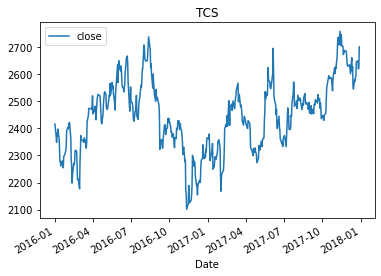

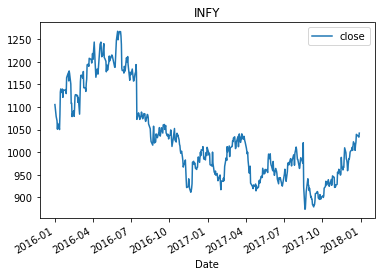

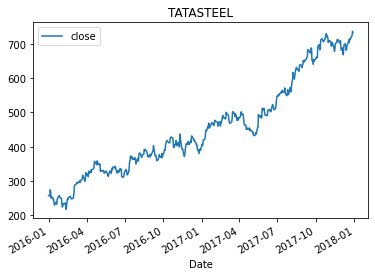

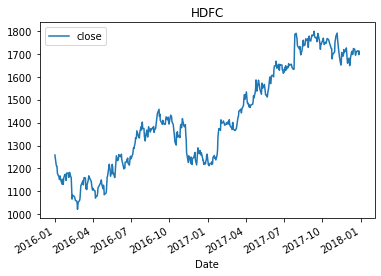

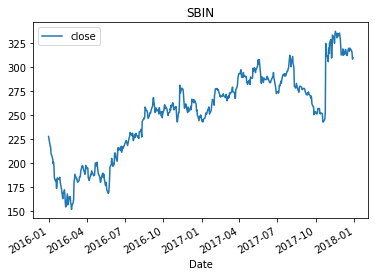

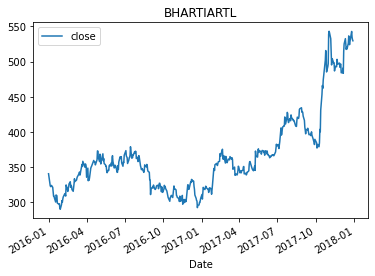

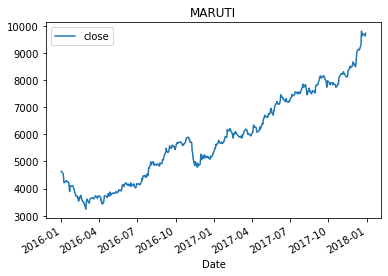

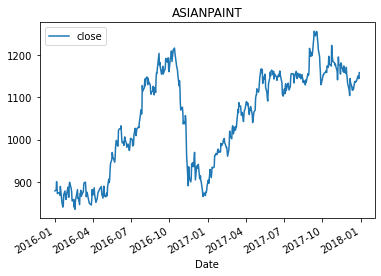

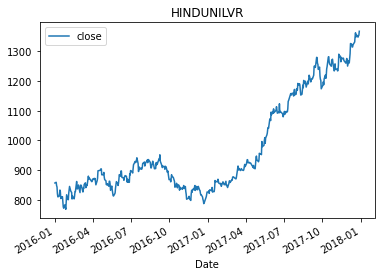

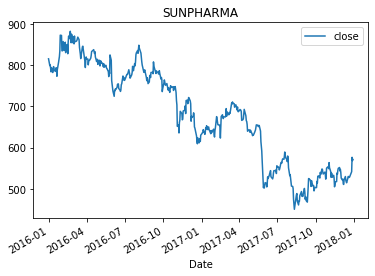

In [28]:
stocks = n50_stocks.index.get_level_values(0).unique()
for s in stocks:
    print()
    _ = n50_stocks.loc[s].plot(title=s)

In [44]:
# Merge all 10 stocks close price into one dataframe
stock_data = [n50_stocks.loc[s] for s in stocks]
for i in range(0, len(stocks)):
    _ = stock_data[i].rename(columns={'close': stocks[i]}, inplace=True) # Rename close column to each stock names
data = merge(stock_data)
data

,TCS,INFY,TATASTEEL,HDFC,SBIN,BHARTIARTL,MARUTI,ASIANPAINT,HINDUNILVR,SUNPHARMA
Date,,,,,,,,,,
2016-01-01,2416.40,1105.25,257.40,1258.45,227.80,340.50,4638.50,878.75,856.55,815.55
2016-01-04,2369.60,1078.90,256.90,1216.70,220.70,326.80,4580.65,880.80,859.00,799.10
2016-01-05,2348.95,1074.05,274.30,1209.40,217.75,323.45,4566.95,900.65,847.95,800.50
2016-01-06,2381.60,1069.35,268.75,1209.30,216.85,322.20,4480.80,886.40,843.05,791.95
2016-01-07,2371.25,1050.80,249.90,1179.45,209.55,322.35,4267.90,872.35,820.25,783.80
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2646.75,1039.35,711.20,1709.35,319.85,528.55,9700.00,1138.00,1356.50,530.95
2017-12-26,2649.45,1035.60,721.65,1713.20,317.15,542.95,9679.00,1150.75,1348.10,541.30
2017-12-27,2619.90,1034.25,723.45,1707.90,314.85,534.65,9644.10,1149.05,1352.45,576.30


In [39]:
## Code to backtest strategy
## Displays portfolio values only on days when traded

from datetime import date as _date

initial_capital = 100000000 # 100 million INR
start_date = _date(2016, 1, 1) # Portfolio Allocation Start Date
end_date = _date(2017, 12, 29) # Portfolio Redemption Date
allocation_ratio = [10] * 10 # Allocation ratio of 10% in 10 stocks
prev_units = [0, 0, 0] # Unit allocation initialization
prev_cash = 0 # Cash initialization
month = data.index.month

print('Start....')
print('Investments ratio & Units in order of {stocks}')
print('===========================================================')
print(date)
print(f'Initial Capital : {initial_capital}')
print('Begin portfolio allocation')

# Initial capital allocation
cash, units = invest(initial_capital, [nifty, gold, junior], allocation_ratio) # Initial allocation
print(cash, units)

# Portfolio redemption
print('Portfolio redemption')
cash, units = redeem([nifty, gold, junior], prev_units,cash) # Redeem portfolio, go all cash
print(cash, units)
print('===========================================================')

{'close_x': 'HINDUNILVR', 'close_y': 'SUNPHARMA'}

In [60]:
tuple([10] * 10)

(10, 10, 10, 10, 10, 10, 10, 10, 10, 10)